In [1]:
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
from scipy.stats import entropy
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import scipy
from sklearn import metrics
from sklearn.metrics import accuracy_score
from keras.layers import SimpleRNN
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout
from tensorflow.keras.layers import Input, Dropout, LSTM
from tensorflow.keras.layers import Bidirectional,BatchNormalization
from tensorflow.keras.layers import PReLU,ReLU,Reshape
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import cross_val_score
from tensorflow.keras.layers import Conv1D,Conv2D,Add
from tensorflow.keras.layers import MaxPool1D, MaxPooling2D
from tensorflow import keras
from tensorflow.keras import callbacks,layers
import random
from sklearn.utils import resample
from tensorflow.keras.utils import plot_model

In [2]:
Empatica = pd.read_csv("BVP_ACC_EDA_TEMP.csv", low_memory=False)

In [3]:
Empatica

,BVP,status,ACC_x,ACC_y,ACC_z,EDA,TEMP
0,52.20,0,6,2,65,1.676214,35.55
1,49.83,0,6,2,65,1.676214,35.55
2,44.65,0,6,2,65,1.676214,35.55
3,35.26,0,6,2,65,1.676214,35.55
4,22.66,0,6,2,65,1.676214,35.55
...,...,...,...,...,...,...,...
287995,5.81,1,-51,-13,-37,0.171678,34.09
287996,6.03,1,-51,-13,-37,0.171678,34.09
287997,6.17,1,-51,-13,-37,0.171678,34.09
287998,6.30,1,-51,-13,-37,0.171678,34.09


<AxesSubplot:>

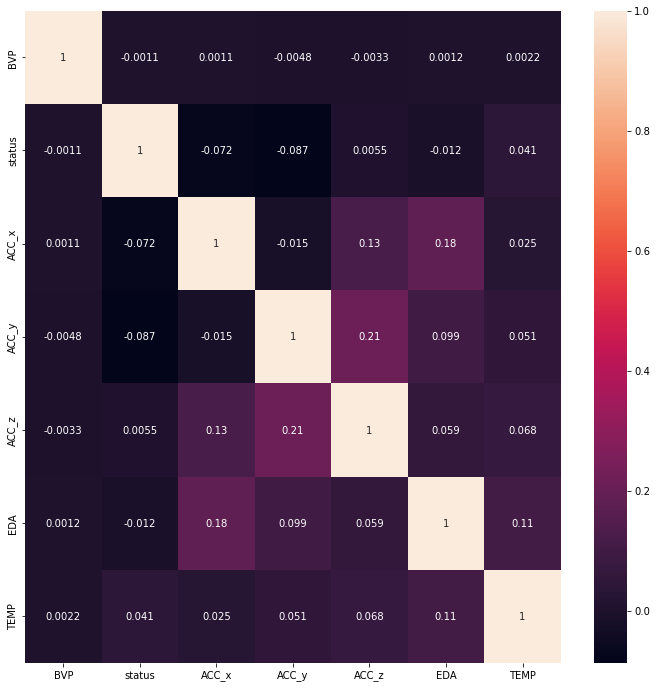

In [4]:
plt.figure(figsize = (12,12))
cor_matrix = Empatica.corr()
sns.heatmap(cor_matrix,annot=True)

In [3]:
y = Empatica.pop('status')
X = Empatica

In [8]:
Empatica

,BVP,ACC_x,ACC_y,ACC_z,EDA,TEMP
0,52.20,6,2,65,1.676214,35.55
1,49.83,6,2,65,1.676214,35.55
2,44.65,6,2,65,1.676214,35.55
3,35.26,6,2,65,1.676214,35.55
4,22.66,6,2,65,1.676214,35.55
...,...,...,...,...,...,...
287995,5.81,-51,-13,-37,0.171678,34.09
287996,6.03,-51,-13,-37,0.171678,34.09
287997,6.17,-51,-13,-37,0.171678,34.09
287998,6.30,-51,-13,-37,0.171678,34.09


In [4]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

In [5]:
x_train,x_test,y_train,y_test = train_test_split(X, y, test_size=0.3)

In [6]:
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from keras.models import Sequential

model = Sequential()
model.add(Conv1D(filters=16, kernel_size=2, activation='relu', input_shape=(6, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Dense(64, activation='relu'))
#model.add(MaxPooling1D(pool_size=2))
#model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, batch_size=128)

Epoch 1/20
1575/1575 [==============================] - 3s 1ms/step - loss: 0.4661 - accuracy: 0.7683 - val_loss: 0.3842 - val_accuracy: 0.8224
Epoch 2/20
1575/1575 [==============================] - 3s 2ms/step - loss: 0.3469 - accuracy: 0.8589 - val_loss: 0.3175 - val_accuracy: 0.8722
Epoch 3/20
1575/1575 [==============================] - 2s 1ms/step - loss: 0.3010 - accuracy: 0.8823 - val_loss: 0.2925 - val_accuracy: 0.8878
Epoch 4/20
1575/1575 [==============================] - 2s 1ms/step - loss: 0.2769 - accuracy: 0.8922 - val_loss: 0.2641 - val_accuracy: 0.8958
Epoch 5/20
1575/1575 [==============================] - 2s 1ms/step - loss: 0.2600 - accuracy: 0.8988 - val_loss: 0.2491 - val_accuracy: 0.9046
Epoch 6/20
1575/1575 [==============================] - 2s 1ms/step - loss: 0.2480 - accuracy: 0.9041 - val_loss: 0.2463 - val_accuracy: 0.9066
Epoch 7/20
1575/1575 [==============================] - 2s 1ms/step - loss: 0.2376 - accuracy: 0.9085 - val_loss: 0.2268 - val_accuracy:

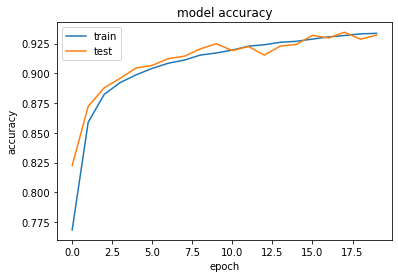

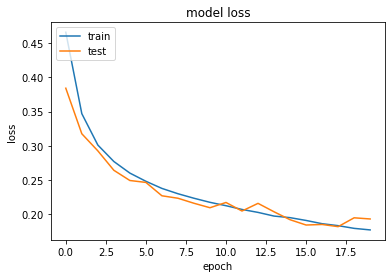

In [9]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig("empatica_acc_cnn.png")
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig("empatica_loss_cnn.png")
plt.show()